In [1]:
import pandas as pd

Physical_data = pd.read_csv('../Data/qual_physi_data.csv')
display(Physical_data)

,生まれ年,年代,体力年齢,性別,身長,tests
0,1950.0,70代男性,50~54,男,164.0,握力（右）
1,1957.0,60代男性,35~39,男,165.0,握力（右）
2,1958.0,60代男性,30~34,男,164.0,握力（右）
3,1960.0,60代男性,45~49,男,170.0,握力（右）
4,1960.0,60代男性,65~69,男,167.0,握力（右）
...,...,...,...,...,...,...
3892,1993.0,20代女性,25~29,女,170.0,肺活量
3893,1994.0,20代女性,30~34,女,156.0,肺活量
3894,1995.0,20代女性,35~39,女,166.0,肺活量
3895,1995.0,20代女性,45~49,女,155.0,肺活量


In [2]:
# testsカラムに全ての種目数が入っているか確認。
tests_list = Physical_data["tests"].unique()
print("一意の「tests」リスト\n", tests_list)

一意の「tests」リスト
 ['握力（右）' '握力（左）' '握力平均' '上体起こし' '上体そらし' '背筋力' '立ち上がり' '30秒立ち座り' '垂直跳び'
 '2ステップ' '2ステップの距離' '立ち幅跳び' '反復横跳び' '20mシャトルラン' 'ハンドボール投げ' '長座体前屈'
 '閉眼片足立ち' '棒反応' '肺活量']


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

sns.set_theme(font_scale=5.0, font='IPAexGothic')

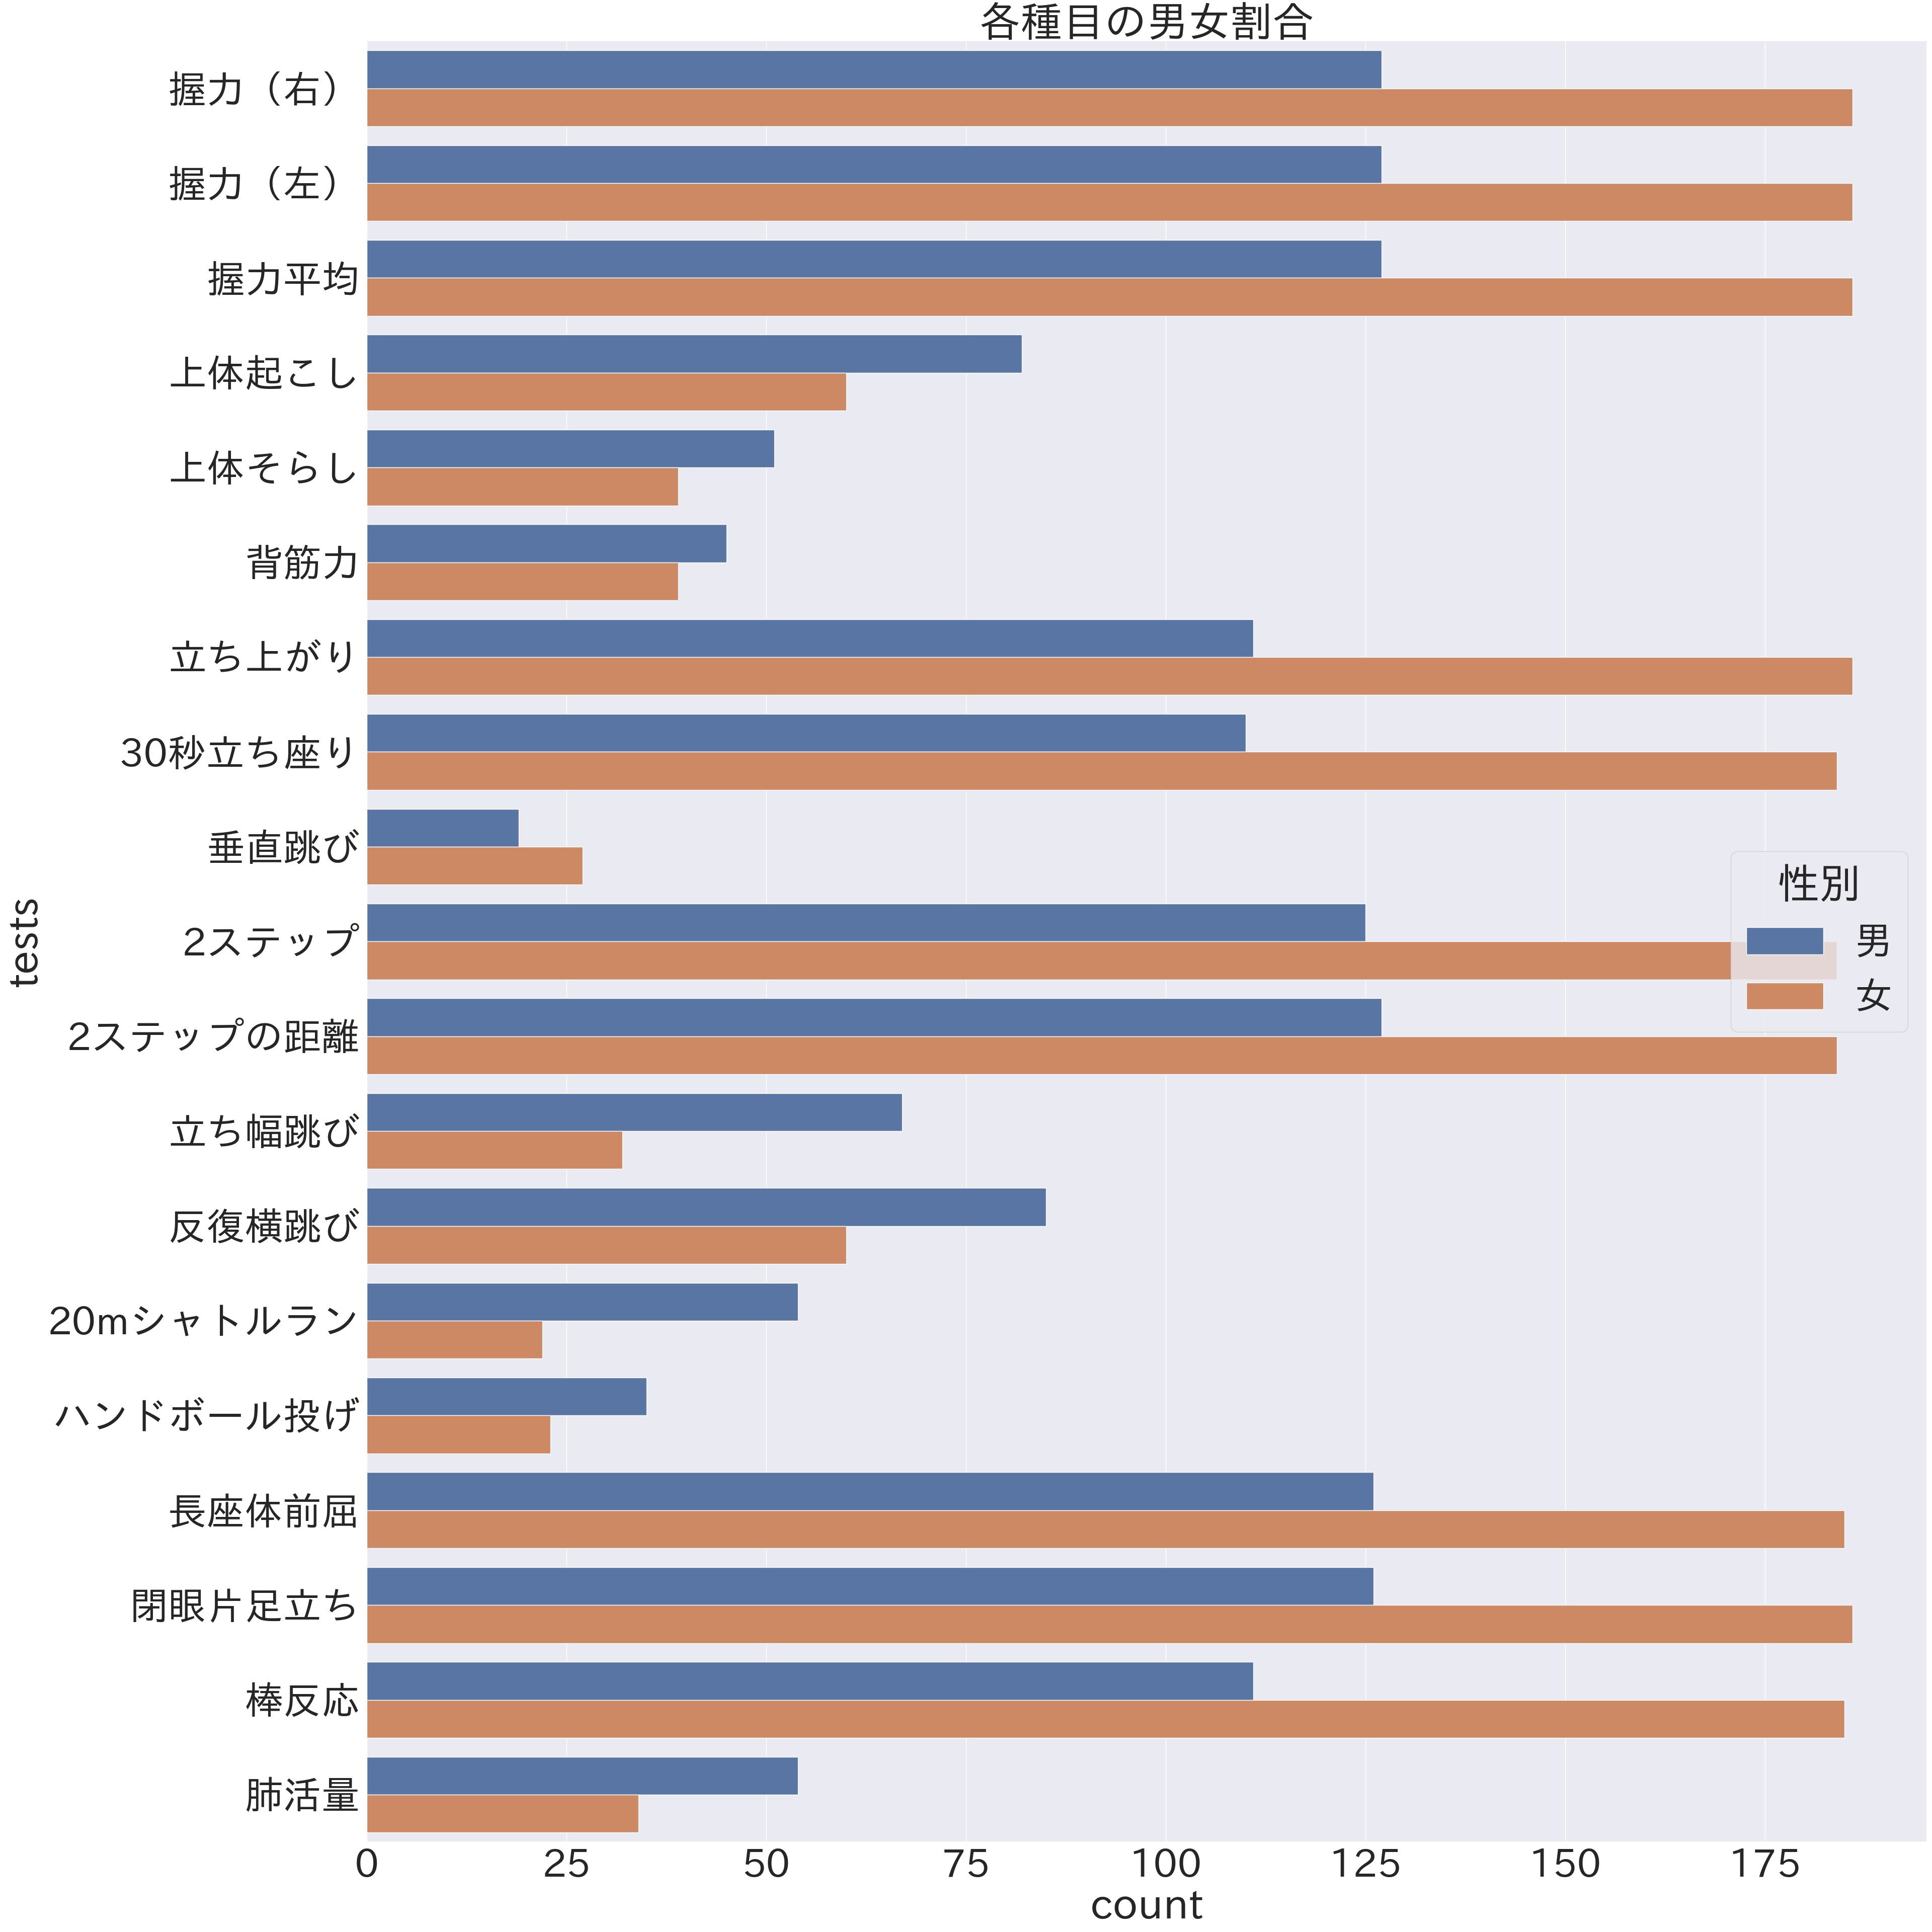

In [4]:
# 各種目の男女割合を可視化
fig, axs = plt.subplots(figsize=(40,40), tight_layout=True)
sns.countplot(y = Physical_data['tests'], hue = Physical_data['性別'],
              hue_order = ['男', '女']).set(title='各種目の男女割合')
results_path = '../Graphs/gender_each_sub.png'
plt.savefig(results_path, bbox_inches='tight')

In [5]:
# 年代カラムの値を確認。
generate_list = Physical_data["年代"].unique()
print("一意の「年代」リスト\n", generate_list)

一意の「年代」リスト
 ['70代男性' '60代男性' '50代男性' '40代男性' '30代男性' '20代男性' '10代男性' '50代女性' '40代女性'
 '30代女性' '20代女性' '10代女性' nan]


In [6]:
# 年代カラムの値を性別分類無しの、年代のみに置換
Physical_data['年代'] = Physical_data['年代'].str.replace('.性','', regex=True)
generate_list = Physical_data["年代"].unique()
print("一意の「年代」リスト\n", generate_list)

一意の「年代」リスト
 ['70代' '60代' '50代' '40代' '30代' '20代' '10代' nan]


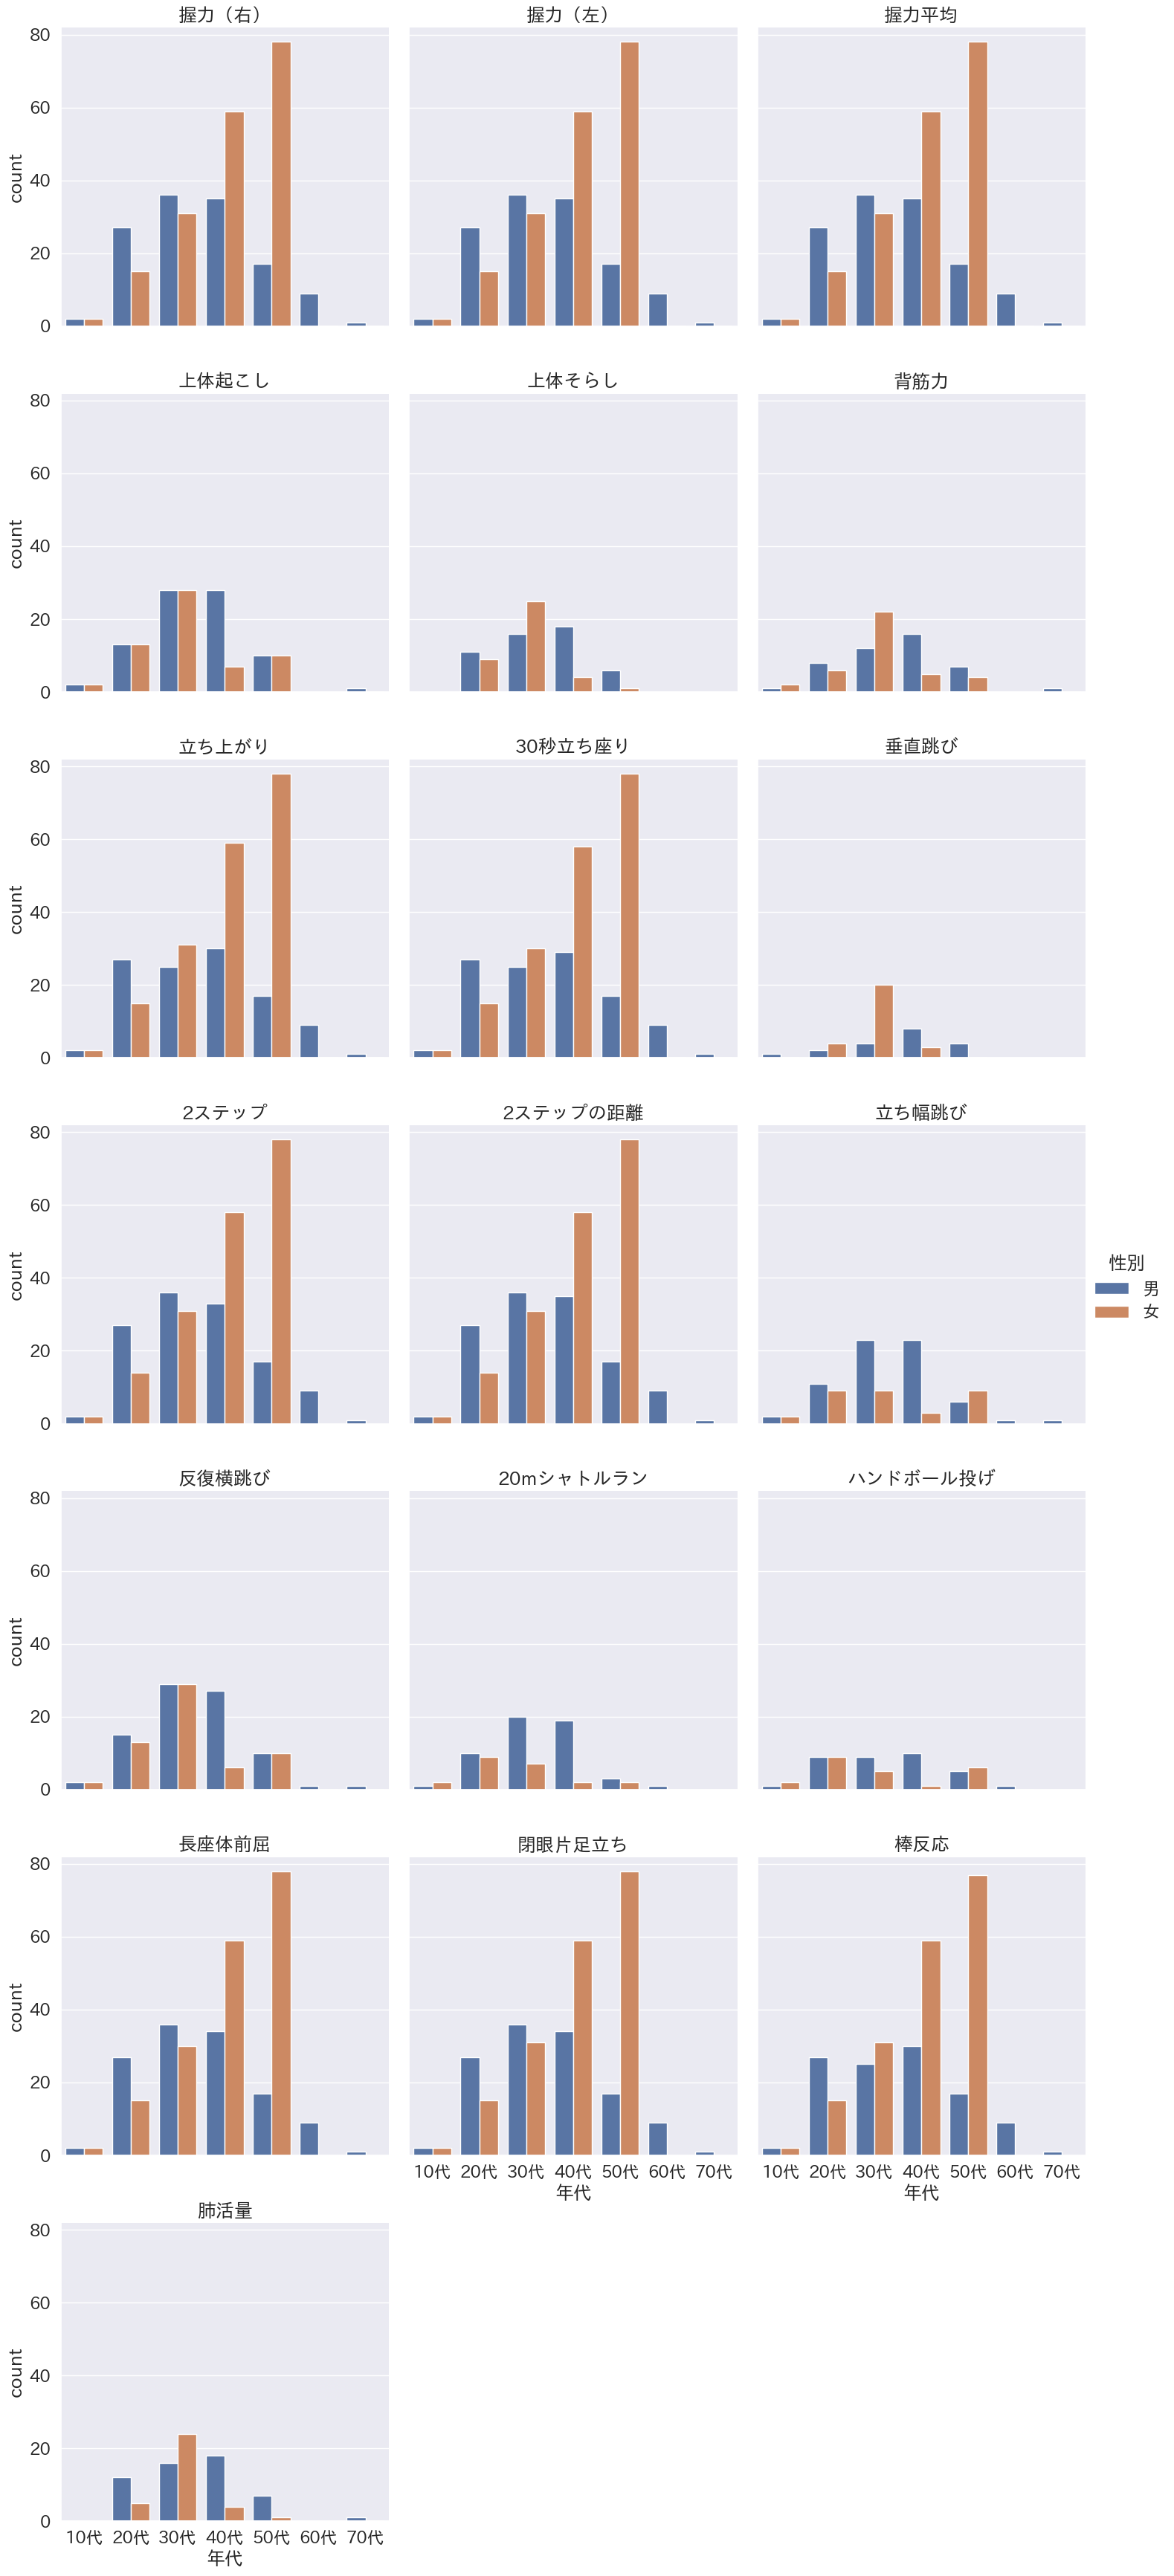

In [7]:
# 各種目の年代・男女別のデータ数を可視化する
sns.set_theme(font_scale=1.5, font='IPAexGothic')
generate = sns.catplot(data=Physical_data, kind='count', x='年代', order = ['10代', '20代', '30代', '40代', '50代', '60代', '70代'],
                       col='tests', hue="性別", col_wrap=3)
for item, ax in generate.axes_dict.items():
     ax.grid(False, axis='x')
     ax.set_title(item)
results_path = '../Graphs/各種目の年代割合.png'
plt.savefig(results_path, bbox_inches='tight')